# Create a Neural Network from Scratch
This notebook aims to demonstrate the creation of a neural network from scratch using Python and NumPy. It walks through the implementation of essential components such as layers, activation functions, and the neural network itself. The network is then trained on a simple dataset and tested on the XOR problem to showcase its capabilities.

## Create a layer class
Here, a base class for layers in the neural network is defined. This class will be inherited by specific layer types such as Dense layers and Activation layers.

`Layer` class in a neural network typically contains the following methods:
- `forward(input)`: This method calculates the output of the layer for a given input.
- `backward(grad_output, lr)`: This method calculates the gradient of the loss with respect to the input of the layer and updates the layer's parameters based on the gradient and learning rate. 

In [28]:
import numpy as np

# Define a base class for layers of the neural network
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self, input):
        # This method will be overridden by subclasses
        pass

    def backward(self, grad_output, lr):
        # This method will be overridden by subclasses
        pass


## Create a Dense Layer
The Dense layer is a fully connected layer where each neuron is connected to every neuron in the previous layer. This section defines the Dense layer class along with methods for forward propagation and backpropagation.

 - `forward(input)`: This method calculates the output of the Dense layer for a given input. It performs a dot product between the input and the weights, then adds the biases.
- `backward(grad_output, lr)`: This method calculates the gradient of the loss with respect to the input of the layer, as well as the gradients with respect to the weights and biases. It updates the weights and biases based on these gradients and the learning rate.


In [29]:
# Define a class for Dense layers
class Dense(Layer):
    def __init__(self, input_size, output_size):
        # Initialize weights and biases
        self.weights = np.random.randn(output_size, input_size)
        self.biases = np.random.randn(output_size, 1)
    
    def forward(self, input):
        # Store input and compute output
        self.input = input
        self.output = np.dot(input, self.weights.T) + self.biases.T
        return self.output

    def backward(self, grad_output, lr):
        # Compute gradient with respect to input
        grad_input = np.dot(grad_output, self.weights)

        # Compute gradient with respect to weights and biases
        grad_weights = np.dot(self.input.T, grad_output)
        grad_biases = np.sum(grad_output, axis=0, keepdims=True)

        # Update weights and biases
        self.weights -= lr * grad_weights.T
        self.biases -= lr * grad_biases.T

        return grad_input


## Create an Activation Layer
Activation functions introduce non-linearity to the neural network, allowing it to learn complex patterns in data. This section defines a base class for activation functions and implements specific activation functions like Tanh and Sigmoid.

- `forward(input)`: This method applies the activation function to the input.
- `backward(output_gradient, lr)`: This method calculates the gradient of the loss with respect to the input of the activation layer using the derivative of the activation function.


In [30]:
# Define a base class for activation functions
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        # Store input and compute output
        self.input = input
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        # Compute gradient with respect to input
        return output_gradient * self.activation_prime(self.input)

## Create Instances of an Activation layer
In this section, instances of activation layers using Tanh and Sigmoid functions are created. These activation layers will be used in the neural network for introducing non-linearity.

- The Tanh activation function is defined as `tanh(x) = (e^x - e^-x) / (e^x + e^-x)`, which outputs values between -1 and 1.
- The derivative of the Tanh function is `tanh_prime(x) = 1 - tanh(x)^2`, which is used during backpropagation to compute gradients.


In [31]:
# Define a class for Tanh activation function
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

# Define a function for computing Mean Squared Error
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# Define a function for computing the derivative of Mean Squared Error
def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def accuracy(y_true, y_pred):
    predictions = y_pred > 0.5
    return np.mean(predictions == y_true)

- The Sigmoid activation function is defined as `sigmoid(x) = 1 / (1 + e^-x)`, which outputs values between 0 and 1.
- The derivative of the Sigmoid function is `sigmoid_prime(x) = sigmoid(x) * (1 - sigmoid(x))`, which is used during backpropagation to compute gradients.


In [32]:
class Sigmoid(Activation):
    def __init__(self):
        pass

    def forward(self, inputs):
        return 1 / (1 + np.exp(-inputs))

    def backward(self, dvalues, inputs):
        sigmoid = self.forward(inputs)
        return dvalues * sigmoid * (1 - sigmoid)


## Create a NeuralNetwork
The NeuralNetwork class is defined here, which encapsulates the layers and methods for forward and backward propagation. Additionally, a training method is implemented to train the network on provided data.
- `forward(input_data)`: This method passes the input data through all layers of the network and computes the output.
- `backward(output_gradient, learning_rate)`: This method passes the output gradient through all layers in reverse order, updating the weights and biases of the Dense layers.
- `train(x_train, y_train, x_val, y_val, epochs, learning_rate)`: This method trains the neural network using the training data, computes the training and validation errors and accuracies, and updates the network's parameters.
- `plot_errors()`: This method plots the training and validation errors over epochs.
- `plot_accuracies()`: This method plots the training and validation accuracies over epochs.



In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.train_errors = []
        self.val_errors = []
        self.train_accuracies = []
        self.val_accuracies = []


    def forward(self, input_data):
        # Pass the input data through all layers
        for layer in self.layers:
            input_data = layer.forward(input_data)
        return input_data

    def backward(self, output_gradient, learning_rate):
        # Pass the output gradient through all layers in reverse order
        for layer in reversed(self.layers):
            output_gradient = layer.backward(output_gradient, learning_rate)
        return output_gradient

    def train(self, x_train, y_train, x_val, y_val, epochs, learning_rate):
        for i in range(epochs):
            output = self.forward(x_train)
            error = mse(y_train, output)
            self.train_errors.append(error)
            train_acc = accuracy(y_train, output)
            self.train_accuracies.append(train_acc)
            error_gradient = mse_prime(y_train, output)
            self.backward(error_gradient, learning_rate)
            
            val_output = self.forward(x_val)
            val_error = mse(y_val, val_output)
            self.val_errors.append(val_error)
            val_acc = accuracy(y_val, val_output)
            self.val_accuracies.append(val_acc)
            
            print(f'Epoch {i+1}/{epochs}, Error: {error:.4f}, Accuracy: {train_acc:.4f}, Val Error: {val_error:.4f}, Val Accuracy: {val_acc:.4f}')

    
    def plot_errors(self):
        # Plot the learning curve
        plt.plot(self.errors)
        plt.title('Learning Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.show()

    def plot_errors(self):
        plt.plot(self.train_errors, label='Train Error')
        plt.plot(self.val_errors, label='Validation Error')
        plt.title('Error Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.legend()
        plt.show()

    def plot_accuracies(self):
        plt.plot(self.train_accuracies, label='Train Accuracy')
        plt.plot(self.val_accuracies, label='Validation Accuracy')
        plt.title('Accuracy Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()



## Create some tests
This section contains test functions to verify the implementation of layers and the neural network. It tests the forward propagation of individual layers and the training process of the neural network.

### Testing Layers
- This function tests the Dense layer and the Tanh and Sigmoid activation functions by passing a sample input through them and printing the outputs.

### Testing Neural Network
- This function defines a simple neural network with two Dense layers and Tanh and Sigmoid activation functions.
- It trains the network on a small dataset and prints the training progress.


In [34]:
# Test functions
def test_layers():
    # Test the Dense layer, Tanh and Sigmoid activation functions
    dense = Dense(4, 4)
    tanh = Tanh()
    sigmoid = Sigmoid()
    input_data = np.array([1, 2, 3, 4])
    output = dense.forward(input_data)
    print("Dense layer output: ", output)
    output = tanh.forward(output)
    print("Tanh activation output: ", output)
    output = sigmoid.forward(output)
    print("Sigmoid activation output: ", output)

# Test Neural Network
def test_neural_network():
    # Define the layers of the network
    layers = [Dense(4, 3), Tanh(), Dense(3, 1), Sigmoid()]
    # Create the network
    nn = NeuralNetwork(layers)
    # Define training data
    x_train = np.array([[1, 2, 3, 4], [2, 3, 4, 5]])
    y_train = np.array([[0.5], [0.6]])
    # Train the network
    nn.train(x_train, y_train, x_train, y_train, epochs=10, learning_rate=0.05)

# Run the test functions
test_layers()
test_neural_network()


Dense layer output:  [[ 6.97741832  2.92659922 -6.02891741  3.34740642]]
Tanh activation output:  [[ 0.99999826  0.99427503 -0.9999884   0.99752843]]
Sigmoid activation output:  [[0.73105824 0.72993149 0.2689437  0.73057236]]
Epoch 1/10, Error: 0.1650, Accuracy: 0.0000, Val Error: 0.1630, Val Accuracy: 0.0000
Epoch 2/10, Error: 0.1630, Accuracy: 0.0000, Val Error: 0.1611, Val Accuracy: 0.0000
Epoch 3/10, Error: 0.1611, Accuracy: 0.0000, Val Error: 0.1591, Val Accuracy: 0.0000
Epoch 4/10, Error: 0.1591, Accuracy: 0.0000, Val Error: 0.1570, Val Accuracy: 0.0000
Epoch 5/10, Error: 0.1570, Accuracy: 0.0000, Val Error: 0.1549, Val Accuracy: 0.0000
Epoch 6/10, Error: 0.1549, Accuracy: 0.0000, Val Error: 0.1528, Val Accuracy: 0.0000
Epoch 7/10, Error: 0.1528, Accuracy: 0.0000, Val Error: 0.1506, Val Accuracy: 0.0000
Epoch 8/10, Error: 0.1506, Accuracy: 0.0000, Val Error: 0.1483, Val Accuracy: 0.0000
Epoch 9/10, Error: 0.1483, Accuracy: 0.0000, Val Error: 0.1459, Val Accuracy: 0.0000
Epoch 10/

## XOR
The XOR problem is a classic problem in machine learning where the task is to predict the output of an XOR gate given two binary inputs. This section trains the neural network on the XOR problem and evaluates its performance on test data.

- The XOR function is defined as `xor(a, b) = (a and not b) or (not a and b)`, where `a` and `b` are binary inputs.


In [35]:
def xor(a, b):
    return (a and not b) or (not a and b)


Epoch 1/5000, Error: 0.3133, Accuracy: 0.5000, Val Error: 0.3087, Val Accuracy: 0.5000
Epoch 2/5000, Error: 0.3087, Accuracy: 0.5000, Val Error: 0.3046, Val Accuracy: 0.7500
Epoch 3/5000, Error: 0.3046, Accuracy: 0.7500, Val Error: 0.3009, Val Accuracy: 0.7500
Epoch 4/5000, Error: 0.3009, Accuracy: 0.7500, Val Error: 0.2977, Val Accuracy: 0.7500
Epoch 5/5000, Error: 0.2977, Accuracy: 0.7500, Val Error: 0.2947, Val Accuracy: 0.7500
Epoch 6/5000, Error: 0.2947, Accuracy: 0.7500, Val Error: 0.2919, Val Accuracy: 0.7500
Epoch 7/5000, Error: 0.2919, Accuracy: 0.7500, Val Error: 0.2893, Val Accuracy: 0.7500
Epoch 8/5000, Error: 0.2893, Accuracy: 0.7500, Val Error: 0.2868, Val Accuracy: 0.7500
Epoch 9/5000, Error: 0.2868, Accuracy: 0.7500, Val Error: 0.2844, Val Accuracy: 0.7500
Epoch 10/5000, Error: 0.2844, Accuracy: 0.7500, Val Error: 0.2822, Val Accuracy: 0.7500
Epoch 11/5000, Error: 0.2822, Accuracy: 0.7500, Val Error: 0.2800, Val Accuracy: 0.5000
Epoch 12/5000, Error: 0.2800, Accuracy: 0

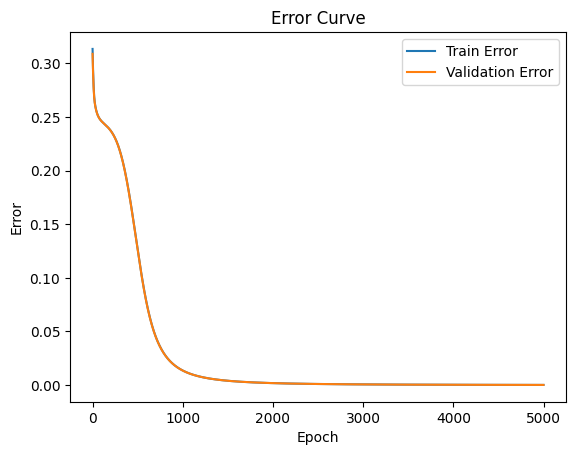

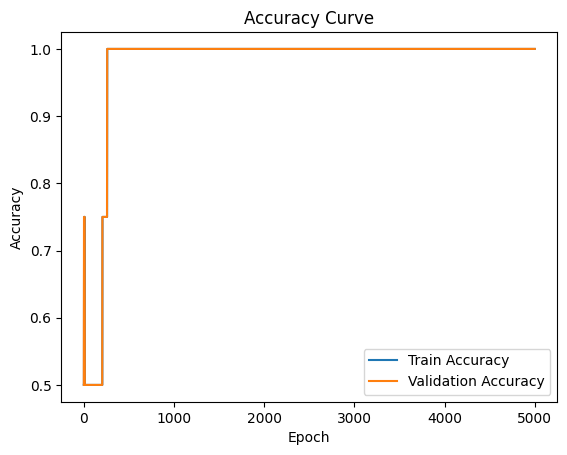

Test results:
[0 0] => 0.0101 (expected 0)
[0 1] => 0.9823 (expected 1)
[1 0] => 0.9816 (expected True)
[1 1] => 0.0092 (expected False)


In [36]:
# Define the layers of the network
layers = [Dense(2, 3), Tanh(), Dense(3, 1), Sigmoid()]

# Create the network
nn = NeuralNetwork(layers)

# Define training data for XOR
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# Define validation data for XOR (same as training data in this case)
x_val = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_val = np.array([[0], [1], [1], [0]])

# Train the network
nn.train(x_train, y_train, x_val, y_val, epochs=5000, learning_rate=0.1)

# Plot the learning curve
nn.plot_errors()
nn.plot_accuracies()

# Test the network
x_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = nn.forward(x_test)

print("Test results:")
for i in range(len(x_test)):
    print(f"{x_test[i]} => {y_test[i][0]:.4f} (expected {xor(x_test[i][0], x_test[i][1])})")
